In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Clustering with multiple features

let's perform clustering on the FIFA dataset, While it is important to understand that all features can not be visualized and assessed at the same time when clustering with more than 3 features, we will discuss a few techniques to validate your results. 

In [3]:
df = pd.read_csv("fifa_18_sample_data.csv")
df.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


In [4]:
features = ["ID","name","pac","sho","pas","dri","def", "phy","heading_accuracy","volleys","finishing"]

In [5]:
fifa = df[features]
fifa.head()

,ID,name,pac,sho,pas,dri,def,phy,heading_accuracy,volleys,finishing
0,20801,Cristiano Ronaldo,90,93,82,90,33,80,88,88,94
1,158023,L. Messi,89,90,86,96,26,61,71,85,95
2,190871,Neymar,92,84,79,95,30,60,62,83,89
3,176580,L. Suárez,82,90,79,87,42,81,77,88,94
4,167495,M. Neuer,91,90,95,89,60,91,25,11,13


In [6]:
fifa.to_csv("FIFA-18.csv", index=False)

In [5]:
# Import the whiten function
from scipy.cluster.vq import whiten

In [6]:
fifa['scaled_pac'] = whiten(fifa["pac"])
fifa['scaled_sho'] = whiten(fifa["sho"])
fifa['scaled_pas'] = whiten(fifa["pas"])
fifa['scaled_dri'] = whiten(fifa["dri"])
fifa['scaled_def'] = whiten(fifa["def"])
fifa['scaled_phy'] = whiten(fifa["phy"])
fifa['scaled_heading_accuracy'] = whiten(fifa["heading_accuracy"])
fifa['scaled_volleys'] = whiten(fifa["volleys"])
fifa['scaled_finishing'] = whiten(fifa["finishing"])

<ipython-input-6-14bfbb8983b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa['scaled_pac'] = whiten(fifa["pac"])
<ipython-input-6-14bfbb8983b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa['scaled_sho'] = whiten(fifa["sho"])
<ipython-input-6-14bfbb8983b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [7]:
fifa.head()

,ID,name,pac,sho,pas,dri,def,phy,heading_accuracy,volleys,finishing,scaled_pac,scaled_sho,scaled_pas,scaled_dri,scaled_def,scaled_phy,scaled_heading_accuracy,scaled_volleys,scaled_finishing
0,20801,Cristiano Ronaldo,90,93,82,90,33,80,88,88,94,7.743447,6.789714,9.291969,9.534738,1.649258,9.374085,4.225790,4.047019,4.137214
1,158023,L. Messi,89,90,86,96,26,61,71,85,95,7.657409,6.570691,9.745236,10.170387,1.299416,7.147740,3.409445,3.909052,4.181227
2,190871,Neymar,92,84,79,95,30,60,62,83,89,7.915524,6.132645,8.952019,10.064446,1.499326,7.030564,2.977261,3.817074,3.917150
3,176580,L. Suárez,82,90,79,87,42,81,77,88,94,7.055141,6.570691,8.952019,9.216914,2.099056,9.491261,3.697567,4.047019,4.137214
4,167495,M. Neuer,91,90,95,89,60,91,25,11,13,7.829485,6.570691,10.765086,9.428797,2.998652,10.663022,1.200509,0.505877,0.572168


In [8]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

In [11]:
scaled_features = ['scaled_pac','scaled_sho','scaled_pas','scaled_dri','scaled_def','scaled_phy',
                   'scaled_heading_accuracy', 'scaled_volleys', 'scaled_finishing']

In [12]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(fifa[scaled_features], i)
    distortions.append(distortion)


In [13]:
# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
elbow_plot.head()

,num_clusters,distortions
0,1,2.814555
1,2,2.294081
2,3,1.887649
3,4,1.650676
4,5,1.522176


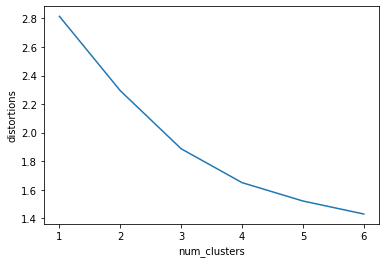

In [14]:
# Create a line plot of num_clusters and distortions
sns.lineplot(x="num_clusters", y="distortions", data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [41]:
# Fit the data into a k-means algorithm
cluster_centers,distortion = kmeans(fifa[scaled_features], 3)

In [42]:
# Assign cluster labels
fifa['cluster_labels'], distortion_list = vq(fifa[scaled_features],cluster_centers)

<ipython-input-42-863cd8d36d0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa['cluster_labels'], distortion_list = vq(fifa[scaled_features],cluster_centers)


In [43]:
#Cluster centers
fifa.groupby('cluster_labels')[scaled_features].mean()

,scaled_pac,scaled_sho,scaled_pas,scaled_dri,scaled_def,scaled_phy,scaled_heading_accuracy,scaled_volleys,scaled_finishing
cluster_labels,,,,,,,,,
0,6.609740,5.402691,8.489977,8.471756,2.487686,8.143934,2.999493,3.241052,3.193382
1,6.927987,5.716566,8.275127,8.753771,2.403786,9.295277,0.682484,0.638146,0.581126
2,5.548443,3.669570,7.213594,6.816777,3.985068,9.197721,3.633977,1.997768,1.888049


In [44]:
# Cluster sizes
print(fifa.groupby('cluster_labels')['ID'].count())

cluster_labels
0    594
1    113
2    293
Name: ID, dtype: int64


<Figure size 1500x400 with 0 Axes>

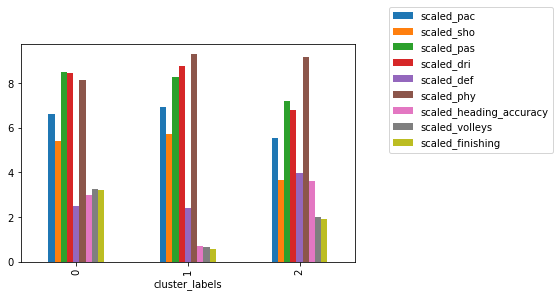

In [45]:
# Plot cluster centers
plt.figure(figsize=(15,4), dpi = 100)
fifa.groupby('cluster_labels')[scaled_features].mean().plot(kind='bar')
plt.legend(loc = (1.1,0.5))
plt.show()

In [46]:
# Get the name column of top 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])

0 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'R. Lewandowski']
1 ['M. Neuer' 'De Gea' 'T. Courtois' 'G. Buffon' 'J. Oblak']
2 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']
